# test-6

LogCircular 1:10 GO (FLUX)

23 dic 2024

   cycle  cells   DoFs     ex POINT err               L2               H1  \
0      0   7584   7742 3.5674313951e+00 2.9288584660e-02 9.0638885160e+02   
1      1   7968   8258 3.1230346132e+00 2.5371036817e-02 8.3980611124e+02   
2      2   8664   9178 2.8707357163e+00 2.3482574651e-02 8.0622807429e+02   
3      3   9672  10594 2.8738271982e+00 2.3579363086e-02 8.0316046538e+02   
4      4  11364  12880 2.8584105512e+00 2.3451034531e-02 8.0014826416e+02   
5      5  14694  17226 2.8818099869e+00 2.3642653515e-02 8.0222706565e+02   
6      6  22260  27282 2.8143328353e+00 2.3102539150e-02 7.9490488298e+02   
7      7  37704  47680 2.2902898315e+00 1.9097127788e-02 7.3716067262e+02   
8      8  70065  89900 1.0917988634e+00 9.8651951876e-03 5.8386384729e+02   

      std FLUX err          est err   Cons. FLUX err  
0 4.5994602189e+03 4.3399378288e+03 4.1031247000e+01  
1 2.9158921874e+03 2.8042931588e+03 7.7724190000e+01  
2 1.7723286668e+03 1.7312807434e+03 1.1101943000e+01  
3 1.12739

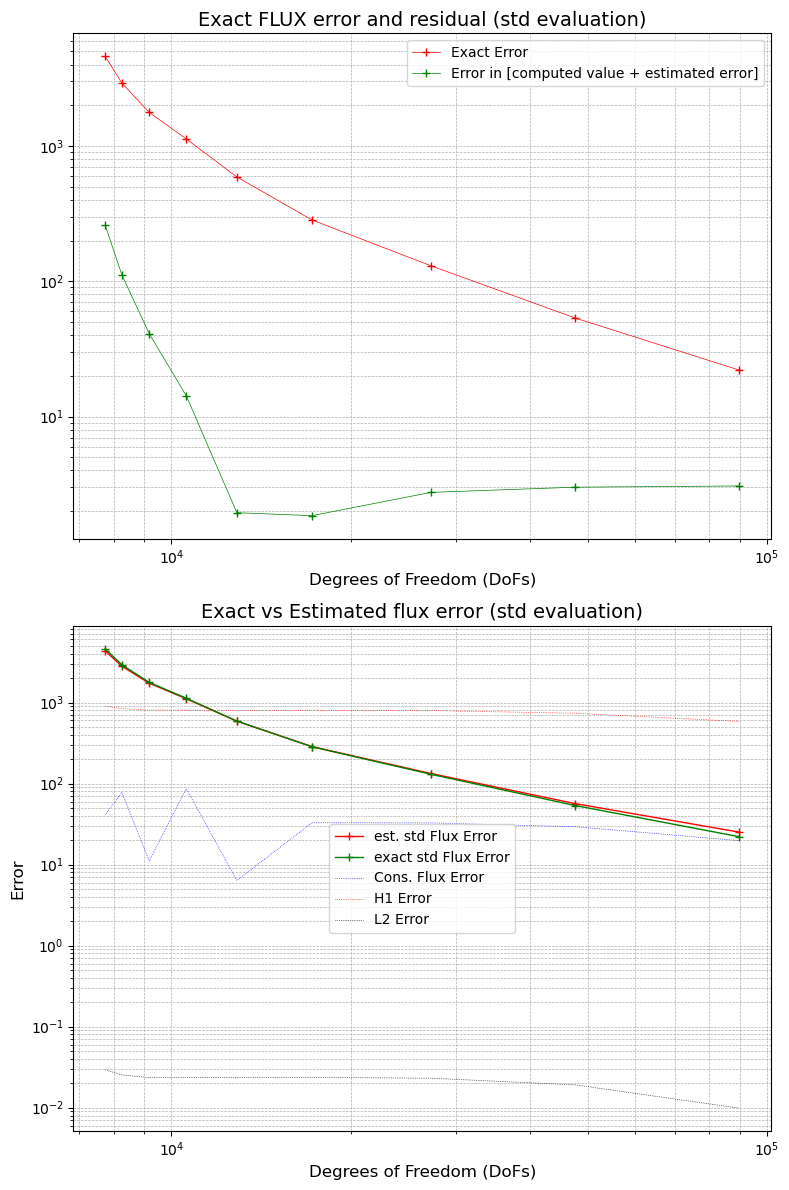

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
file_name = "./results/convergence_results.csv"
data = pd.read_csv(file_name)

# Compute 1/N (1/DoFs)
#data['1/N'] = 1 / data['DoFs']
pd.options.display.float_format = '{:.10e}'.format  # 10 digits of precision
print(data)

# Create the figure
plt.figure(figsize=(8, 12))  # Adjust the figure size for two plots

# Plot 1: Original log-log plot
plt.subplot(2, 1, 1)  # First subplot (top)
plt.loglog(data['DoFs'], data['std FLUX err'], "r-+", linewidth=0.5, label='Exact Error')
plt.loglog(data['DoFs'], abs(data['std FLUX err']-data["est err"]),"g-+", linewidth=0.5, label='Error in [computed value + estimated error]')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.title('Exact FLUX error and residual (std evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.subplot(2, 1, 2)  # Second subplot (bottom)
plt.loglog(data['DoFs'], data['est err'],"r-+", linewidth=1.0, label='est. std Flux Error')
plt.loglog(data['DoFs'], data['std FLUX err'],"g-+", linewidth=1.0, label='exact std Flux Error')
plt.loglog(data['DoFs'], data['Cons. FLUX err'],"b:", linewidth=0.5, label='Cons. Flux Error')
plt.loglog(data['DoFs'], data['H1'],"r:", linewidth=0.5, label='H1 Error')
plt.loglog(data['DoFs'], data['L2'],"k:", linewidth=0.5, label='L2 Error')



plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Exact vs Estimated flux error (std evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
